# Introduction to Python, Part 3

Follow along in **Binder** by clicking the badge below:  

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Arcadia-Science/arcadia-computational-training/das/pytutorial?labpath=docs%2Farcadia-users-group%2F20230328-intro-to-python-3%2Flesson.ipynb)

---
## 0. Packages

This lesson is the third in a series of workshops that provide an introduction to programming using Python.

**This lesson** builds on the foundation of lessons 1 and 2 and covers:
- packages (also known as libraries)
- interfacing with files using **`os`**
- running from the command line with **`subprocess`**
- mathematical operations with **`math`**
- file I/O (input/output) using `open()`
- plotting using **`matplotlib`**
- `DataFrame` operations using **`pandas`**

---
## 1. Built-in Packages

Using the basics of Python we've learned so far, it's possible to perform _many_ operations you might want to deal with in Python. In theory, you could probably write a script or function to do just about anything you wanted using just base Python language.  

However, that would probably not be an efficient use of your time!  

It turns out that there are many built-in packages that Python provides to do more complex things, built upon the Python language.

---
### 1.1 File handling with **`os`**
Importing a package in Python is pretty straightforward. Below, we import the **`os`** package.

In [1]:
import os

That wasn't so bad, was it?  

Let's explore some of the functions of the **`os`** package.  
The function `os.getcwd()` returns the current working directory your script or Jupyter notebook is located in.  
You might notice that we access this function using a dot `.` operator, much like we use when accessing the method of a data type, such as `list.append()`.

In [2]:
os.getcwd()

'/home/ec2-user/arcadia-computational-training/docs/arcadia-users-group/20230314-intro-to-python-3'

Another helpful function is `os.listdir()`, which returns a list of all files in the current directory.

In [3]:
os.listdir()

['lesson.ipynb', '.ipynb_checkpoints', 'hello.txt', 'practice2.txt']

You can find more information about the functions in **`os`** using [Python's web documentation](https://docs.python.org/3/library/os.html).  
Most of the functions in `os` are not things we'd need to use for biological data analysis.  
The most useful part of `os` for us is actually one of its **modules**. 

A **module** is a sub-collection of functions within a package.  
You can access modules in the same way you access the methods of a data type, using a dot `.` operator.

A particularly useful module of **`os`** is **`os.path`**. You can find its web documentation [here](https://docs.python.org/3/library/os.path.html#module-os.path).  
For example, you can use the `os.path.exists()` function to see if a file exists at a specific location.

In [4]:
os.path.exists('hello.txt')

True

You can also use `os.path` to get the path to a specific file in both absolute and relative formats.

In [5]:
# Prints the relative path to the file
print(os.path.relpath('hello.txt'))

# Prints the absolute path to the file
print(os.path.abspath('hello.txt'))

hello.txt
/home/ec2-user/arcadia-computational-training/docs/arcadia-users-group/20230314-intro-to-python-3/hello.txt


These functions can be particularly helpful when using Python to create or modify files used for bioinformatic analysis.

---
### 1.2 Interfacing with the command line using **`subprocess`**

Many bioinformatic software packages are executed through the command line.  
For example, `tblastn` can be run using your terminal if you have it installed.

Jupyter notebooks have certain "magic" functions of cells that can allow you to run specific command line functions directly through your notebook.

For example, basic commands such as `ls` or `pwd` can be run when typed directly into a cell.

In [6]:
ls

hello.txt  lesson.ipynb  practice2.txt


In [7]:
pwd

'/home/ec2-user/arcadia-computational-training/docs/arcadia-users-group/20230314-intro-to-python-3'

However, not all command line functions can be accessed in this way.  
For example, you can't use the `which` utility using Jupyter magic - you'll get an error instead.

In [8]:
which python

SyntaxError: invalid syntax (1722139382.py, line 1)

For commands that aren't compatible with this approach, you can use a different type of Jupyter magic syntax using the exclamation point operand `!`.

In [9]:
!which python

/home/ec2-user/miniconda3/envs/GeneFinder/bin/python


This can be really nice when you plan on programming interactively.  
However, using the exclamation point Jupyter magic doesn't translate well if you were to convert your Jupyter notebook into a Python script.  
The details aren't important for this workshop, but if you were to try to use the exclamation point operator, you'd have to rewrite some of your code, which is never fun!  

Instead of relying Jupyter magic, we generally recommend using the package **`subprocess`**, which passes commands from Python into the shell.

In [10]:
import subprocess

subprocess.run(['which', 'python'])

/home/ec2-user/miniconda3/envs/GeneFinder/bin/python


CompletedProcess(args=['which', 'python'], returncode=0)

The code above runs the same as `!which python`.  
`subprocess.run` passes each element of a list as an argument to the shell. 

It's unfortunately not as tidy looking, but it does allow for more robust code that can be converted to Python packages or functions without rewriting!

---
### 1.3 **`math`** ematics

The built-in **`math`** package can perform some useful mathematical operations.

In [11]:
import math

# Take the natural logarithm of a number
print(math.log(2))

# Take the square root of a number
print(math.sqrt(4))

# Get the factorial of a number
print(math.factorial(3))

0.6931471805599453
2.0
6


In addition to its many functions, **`math`** also includes hard-coded values such as:

In [12]:
print(math.pi)

print(math.e)

3.141592653589793
2.718281828459045


Packages can thus be used to distribute specific numbers in addition to helpful functions!

---
## P1. Practice

Let's try using some Python packages to do useful things.

> ### Practice 1
> Using a `for` loop, create a directory called `testfiles/` in the current directory and populate it with empty files numbered `file1.txt` to `file5.txt`
>
> **Hint:** The command-line tool `touch` creates an empty file. Its syntax is `touch filename`.

<details>
<summary> Practice 1 Sample Answer </summary>
    <br>
    <pre><code><b>import</b> subprocess
<b>import</b> os

numbers = [1, 2, 3, 4, 5]

destination = 'testfiles/'
os.mkdir(destination)

<b>for</b> number <b>in</b> numbers:
    filename = 'file' + str(number) + '.txt'
    subprocess.run(['touch', destination + filename])
</code></pre>
</details>

In [13]:
###############################################
##### Write your code in the space below. #####
#### Then run the cell to check your work. ####



###############################################

# Prints 'True' if all files exist, else False.
# This checker uses a special syntax called a List Comprehension.
# You don't need to understand this yet, but if you're curious, feel free to ask!
filenames = ['testfiles/file' + str(num) + '.txt' for num in [1, 2, 3, 4, 5]]
print(all([os.path.exists(file) for file in filenames]))

False


---
## 2. Opening files with `open()`

You've created some empty files in the exercise above, but what if you actually wanted to open files?

Python has a built-in function, `open()`, which allows for direct file handling.

In [14]:
file = open('hello.txt')

The `open()` function doesn't print anything - it actually is a data type called `_io.TextIOWrapper`.

In [15]:
type(file)

_io.TextIOWrapper

This particular data type has certain methods, such as `.read()`, which reads each element of the file character by character.

In [16]:
file.read()

'Hello\nworld\nmy\nname\nis\nGuido'

You can see that calling `.read()` returns a `str` which is every character in the file in order.  
This would probably not be a practical way of dealing with a very large file, and is certainly quite a clunky interface.  

You can improve this slightly by using the `.readlines()` method. This splits the file into a list, using a linebreak.

In [17]:
file = open('hello.txt')
file.readlines()

['Hello\n', 'world\n', 'my\n', 'name\n', 'is\n', 'Guido']

Another somewhat annoying aspect of this approach is that you also always have to `.close()` a file when you're done with it, or you can run into all sorts of weird errors.

For example, if we try to read the file again without closing it, we get an empty list.

In [18]:
file.readlines()

[]

To read the file in a different way, we have to `.close()` it and then `open()` it again.

In [19]:
file.close()

file = open('hello.txt')
print(file.readlines())

file.close()

['Hello\n', 'world\n', 'my\n', 'name\n', 'is\n', 'Guido']


---
### 2.1 Opening files more easily using **`with`**

Because of these quirks of Python's file handling using `open()`, the preferred way of loading files is using a **`with`** statement.

This statement works similarly to **`try` - `except` - `finally`** but is mostly used for file streaming.

In [20]:
with open('hello.txt') as file:
    output = file.readlines()
    
print(output)

['Hello\n', 'world\n', 'my\n', 'name\n', 'is\n', 'Guido']


The **`with`** statement is a special kind of statement that does some stuff in the background to automatically `.close()` your file when the code block completes.  
If you're curious, [this tutorial](https://www.freecodecamp.org/news/with-open-in-python-with-statement-syntax-example/) gives some more explanation, but we won't go into the details here.  

---
### 2.2 Writing to files

We've seen how you can pull information out of an existing file and pass it as a string or list.  
But what if you have data that you've generated or loaded in Python and want to actually **save** that information to a file?

You can also use `with open()` for this as well.

In [21]:
my_text = "Let's see if this works..."

with open('newfile.txt', 'w') as file:
    file.write(my_text)

The difference between `read()`ing a file and `write()`ing a file comes from the `'w'` argument we passed to the `open()` function. 

The `open()` function actually accepts two arguments:
- `file`: the path to the file you're opening
- `mode`: how you're opening the file.  
    This is `'r'` or **read** by default - if you want to be able to **write** to file, you use `'w'`.  
    To be able to both **read _and_ write**, you use `'w+'`.
    
Let's check whether our file contains the expected text.

In [22]:
less newfile.txt

Let's see if this works...

Using the Jupyter magic command `less`, we can preview the file we just created. This seems to have worked!

What about if we wanted to write not just a single string, but a list of strings, separated each by a line break?

In [23]:
my_text_list = ['Lorem', 'ipsum', 'dolor', 'sit', 'amet']

with open('newfile2.txt', 'w') as file:
    file.write(my_text_list)

TypeError: write() argument must be str, not list

You'll see that the code above returns a `TypeError: write() argument must be str, not list`.  
We can't pass the variable `my_text_list` to `write()` because it's not a list!

Rather than explaining exactly how to solve this problem, why don't we **practice** figuring out how to solve the problem?

---
## P2. Practice

Let's practice figuring out how to do something in Python!  

> ### Practice 2
> You want to be able to write a list to a file, with each element of the list on a different line in the file.  
> Figure out how to write the list `practice_list` to a file called `practice2.txt`.  
>
> You can already solve this problem with what we've learned, but there are many possible ways to deal with this issue.  
> Try to figure out on your own how you might overcome this problem.
>
> **Tip:** Search engines such as **Google** are your friend in this situation! Try looking for help on websites like [StackOverflow](https://stackoverflow.com/questions/tagged/python), [W3Schools](https://www.w3schools.com/python/default.asp), or [Real Python](https://realpython.com/tutorials/basics/).  
> A huge part of learning how to program is also learning how to search for the solutions to your own programming problems.


<details>
<summary> Practice 2 Sample Answer A </summary>
    <br>
    <b>Using <code>file.writelines()</code>:</b>
    <br><br>
    <pre><code>new_list = []
<b>for</b> word <b>in</b> practice_list:
    new_list.append(word + '\n')
<b>with</b> open('practice2.txt', 'w+') <b>as</b> file:
    file.writelines(new_list)
    </code></pre>
</details>

<details>
    <summary> Practice 2 Sample Answer B </summary>
    <br>
    <b>Using a <code>for</code> loop with <code>file.write()</code>:</b>
    <br><br>
    <pre><code><b>with</b> open('practice2.txt', 'w+') as file:
    <b>for</b> word <b>in</b> practice_list:
        file.write(word)
        file.write('\n')
    </code></pre>
</details>

In [26]:
practice_list = ['We', 'can', 'solve', 'Python', 'problems', 'ourselves']

###############################################
##### Write your code in the space below. #####
#### Then run the cell to check your work. ####




###############################################

with open('practice2.txt', 'r') as file:
    print(file.read())

We
can
solve
Python
problems
ourselves



---
## 3. Installed Packages

One of the awesome things about Python is the large community of other programmers – software engineers, scientists, hobbyists - who are also building functions using Python. Many of these folks share their work through Python **packages** (also sometimes referred to as **libraries**).  

Today we'll have a whirlwind tour about how to import and use some of the more commonly-used packages. We won't cover how to install these packages - many can be installed using **`mamba`**, which is our preferred way of managing software installation. Check out this [AUG training session](https://training.arcadiascience.com/arcadia-users-group/20221017-conda/lesson/) on **`conda`** and **`mamba`** for more. 

We'll be blazing through these examples, so don't worry if you don't understand all of the code in each cell - this is mostly to show you how many different kinds of things you can do with Python packages.

---
### 3.1 Plotting with **`matplotlib`**

Presenting data in a visual format often helps us make decisions or communicate our results.  
A popular Python package for making plots is **`matplotlib`**.

Below, we use the module **`matplotlib.pyplot`** to plot some data using `x` and `y` coordinates.

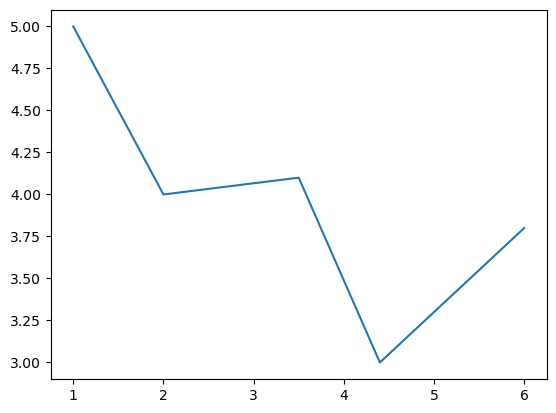

In [133]:
import matplotlib.pyplot as plt

x = [1, 2, 3.5, 4.4, 6]
y = [5, 4, 4.1, 3, 3.8]

plt.plot(x, y)
plt.show()

You'll notice that rather than simply using `import matplotlib.pyplot`, we added an `as plt` expression to the end of our import statement.  
Python allows you to import packages using aliases.  
This saves you from having to type out `matplotlib.pyplot.plot()` and shortens the expression to `plt.plot()`.  

Package documentation examples often gives you a suggestion for how you might abbreviate packages for others to be able to understand.  
The base `matplotlib` package, for example, is often abbreviated as `mpl`.  
You'll see additional examples of this in the other examples we'll look at.

---
### 3.2 Modifying a **`matplotlib`** plot

So, we've plotted a basic line plot. But what do the axes mean? And why is it so large - can we make it smaller?  
**`matplotlib`** is a popular package for plotting because you can customize essentially every single aspect of any plot you make.  

See the comments below for an example of a more customized plot.

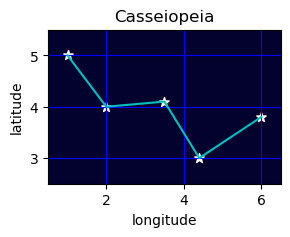

In [134]:
import matplotlib.pyplot as plt

x = [1, 2, 3.5, 4.4, 6]
y = [5, 4, 4.1, 3, 3.8]

# You can establish a figure and set the figure size prior to plotting.
plt.figure(figsize = (3, 2)) 

# You can change the background color of your plot
ax = plt.axes()
ax.set_facecolor("xkcd:midnight") # matplotlib recognizes a variety of color names

plt.plot(x, y, c = 'c', linestyle = '-') # You can change the color (c) to cyan using 'c'. You can also set a dashed ('-') linestyle.

# If you call another plotting function without creating a new figure, you can plot again on the same plot.
plt.scatter(x, y, c = 'w', marker = '*', s = 50) # For a scatter plot, you can choose color (c), marker style, and marker size (s).

# You can set the specific x and y limits of your plot
plt.xlim(0.5, 6.5)
plt.ylim(2.5, 5.5)

# You can have matplotlib show a grid, and choose its color
plt.grid(c = 'b')

# You can label the x and y axes of the plot
plt.xlabel('longitude')
plt.ylabel('latitude')

# You can add a title to the plot
plt.title('Casseiopeia')

plt.show()

This example only scratches the barest surface of what you can do with **`plt`**.  
Future workshops will dive into deeper detail about how **`matplotlib`** works and what you can do with it.

---
### 3.3 Working with `DataFrame`s using **`pandas`**

A popular package for dealing with tabular data like `.tsv` and `.csv` files is **`pandas`**.  
You can use **`pandas`** to load files and perform all manner of database manipulations using `DataFrame` data structures.

In [138]:
import pandas as pd

df = pd.DataFrame(pd.read_csv('cities.csv'))

# The display() function allows us to nicely view tables and other data in Jupyter
display(df)

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State
0,41,5,59,N,80,39,0,W,Youngstown,OH
1,42,52,48,N,97,23,23,W,Yankton,SD
2,46,35,59,N,120,30,36,W,Yakima,WA
3,42,16,12,N,71,48,0,W,Worcester,MA
4,43,37,48,N,89,46,11,W,WisconsinDells,WI
...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,N,119,48,35,W,Reno,NV
124,50,25,11,N,104,39,0,W,Regina,SA
125,40,10,48,N,122,14,23,W,RedBluff,CA
126,40,19,48,N,75,55,48,W,Reading,PA


You can use **`pandas`** to do things like:
- filter your data to get specific subsets
- calculate summaries across specific axes
- perform complex manipulations using aggregation

In [139]:
# Select only rows where the column 'State' is equal to 'CA'
ca_cities = df[df['State'] == 'CA']
display(ca_cities)

# Summarize the number of cities per state
cities_per_state = df.value_counts('State')
display(cities_per_state[0:10]) # Display counts for the top 10 states

# Get a table that lists the name of each city in each state
cities_listed = df[['State', 'City']].groupby('State').agg(lambda x: [i for i in x])
display(cities_listed.head(10)) # Display the first 10 states

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State
18,41,25,11,N,122,23,23,W,Weed,CA
59,37,57,35,N,121,17,24,W,Stockton,CA
85,38,26,23,N,122,43,12,W,SantaRosa,CA
87,34,25,11,N,119,41,59,W,SantaBarbara,CA
88,33,45,35,N,117,52,12,W,SantaAna,CA
89,37,20,24,N,121,52,47,W,SanJose,CA
90,37,46,47,N,122,25,11,W,SanFrancisco,CA
92,32,42,35,N,117,9,0,W,SanDiego,CA
93,34,6,36,N,117,18,35,W,SanBernardino,CA
98,36,40,11,N,121,39,0,W,Salinas,CA


State
CA    12
TX     8
OH     6
WA     6
PA     6
NY     5
FL     5
WI     4
MO     4
GA     4
dtype: int64

,City
State,
AL,"[Tuscaloosa, Selma]"
AZ,[Tucson]
BC,[Vancouver]
CA,"[Weed, Stockton, SantaRosa, SantaBarbara, Sant..."
CO,"[Trinidad, Sterling, Salida]"
CT,[Waterbury]
DC,[Washington]
DE,[Wilmington]
FL,"[WestPalmBeach, Tampa, Tallahassee, Sarasota, ..."


As you might notice, **`pandas`** can do rather complex operations using relatively few commands.  
If you tried to manually build some of these functions, it could be quite challenging!  

Hopefully these examples give you a sense of what you can do using Python if you build your skills and become fluent in the language.